In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
data = pd.read_csv("./house_data_final.csv")

In [3]:
data

,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,Unnamed: 6,건축년도,도로명,매칭 구,...,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,평당가
0,개포래미안포레스트,74.66,202101,17,"245,000",7,NaN,2020,개포로,강남구,...,0.044976,30821.35259,0.022315,1847.35,2.93,2976.21,3.58,928.73,-4.10,10829.091880
1,개포래미안포레스트,59.92,202105,22,"198,500",18,NaN,2020,개포로,강남구,...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,10932.076100
2,개포래미안포레스트,49.92,202105,22,"180,000",7,NaN,2020,개포로,강남구,...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,11899.038460
3,개포래미안포레스트,59.92,202105,22,"198,500",18,NaN,2020,개포로,강남구,...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,10932.076100
4,개포래미안포레스트,49.92,202105,22,"180,000",7,NaN,2020,개포로,강남구,...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,11899.038460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7857,래미안하이베르,59.74,202011,28,"104,000",5,NaN,2011,퇴계로,중구,...,0.031414,29124.03662,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79,5744.894543
7858,래미안하이베르,59.74,202012,1,"102,000",5,NaN,2011,퇴계로,중구,...,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,5634.415802
7859,래미안하이베르,59.74,202012,5,"106,000",13,NaN,2011,퇴계로,중구,...,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,5855.373284
7860,래미안하이베르,84.98,202012,10,"128,000",2,NaN,2011,퇴계로,중구,...,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,4970.581313


In [4]:
print(data["매칭 구"].unique())

['강남구' '강동구' '강북구' '광진구' '구로구' '노원구' '동대문구' '동작구' '마포구' '서대문구' '서초구' '성동구'
 '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '중구']


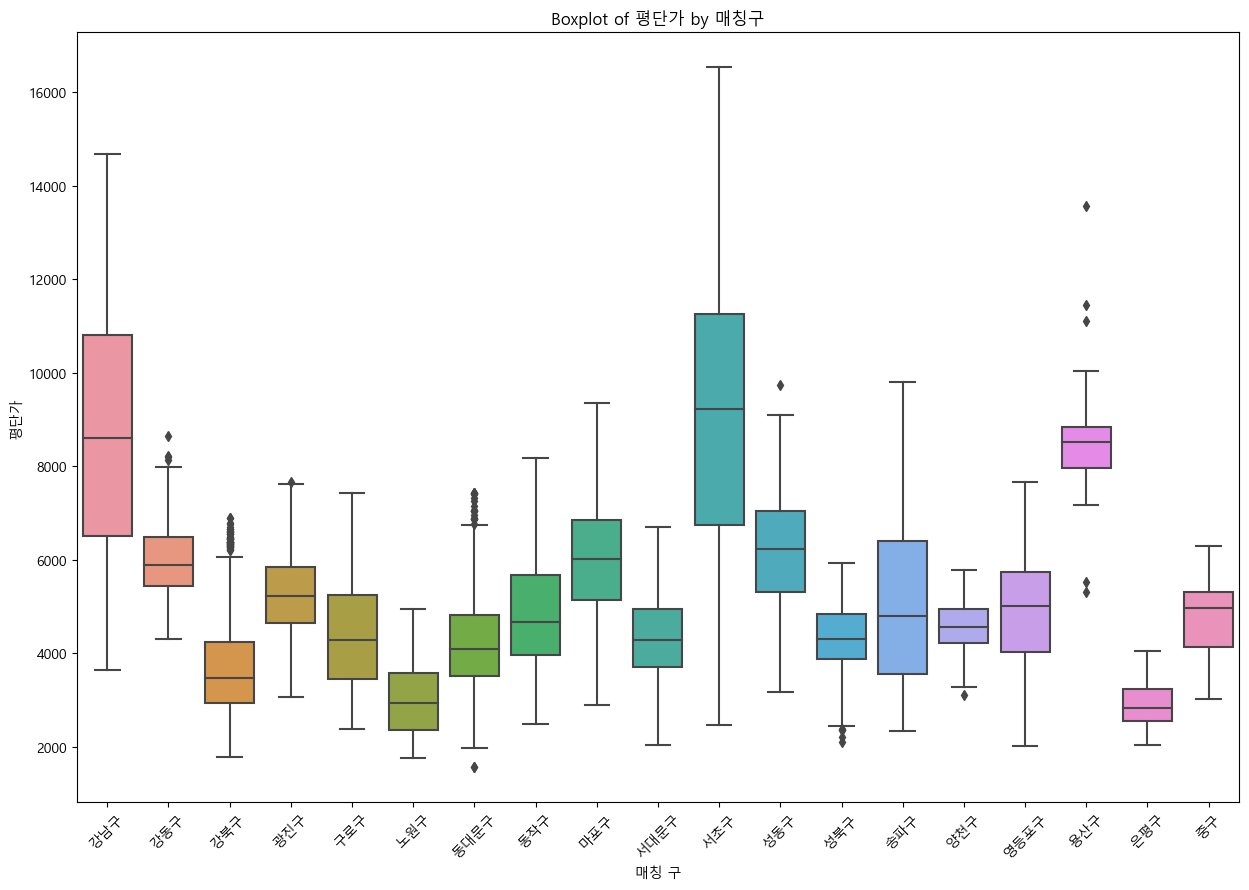

매칭 구
강남구     8643.719014
강동구     5995.370427
강북구     3555.823716
광진구     5312.396082
구로구     4439.677902
노원구     3028.160039
동대문구    4196.714011
동작구     4883.203924
마포구     5995.213980
서대문구    4354.542559
서초구     8802.682454
성동구     6204.758752
성북구     4333.656900
송파구     5038.167361
양천구     4603.582286
영등포구    4958.265987
용산구     8481.974811
은평구     2914.569622
중구      4775.975229
Name: 평당가, dtype: float64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converting '평단가' to numeric (as it seems to be a string)
data['평당가'] = pd.to_numeric(data['평당가'], errors='coerce')

# Grouping data by '매칭구'
grouped_data = data.groupby('매칭 구')

# Creating boxplots for each group's '평단가' to visualize outliers
plt.figure(figsize=(15,10))
sns.boxplot(x='매칭 구', y='평당가', data=data)
plt.xticks(rotation=45)
plt.title('Boxplot of 평단가 by 매칭구')
plt.ylabel('평단가')
plt.xlabel('매칭 구')
plt.show()

# Identifying and removing outliers for each group in '평단가'
# Using IQR (Interquartile Range) method
cleaned_data = pd.DataFrame()
for name, group in grouped_data:
    Q1 = group['평당가'].quantile(0.25)
    Q3 = group['평당가'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_group = group[(group['평당가'] >= lower_bound) & (group['평당가'] <= upper_bound)]
    cleaned_data = pd.concat([cleaned_data, filtered_group], axis=0)

# Calculating the mean of '평단가' for each group in the cleaned data
mean_prices = cleaned_data.groupby('매칭 구')['평당가'].mean()
mean_prices


##이상치를 제거한, 0.25~0.75만 확인해보기!

하위 25% :  6506.4915492499995
상위 25% :  10805.353935
강남구 평균 평당가:  8643.719014115162
강남구 전체 개수 : 686
강남구 필터링 개수 342
이상치 개수(제거) : 344


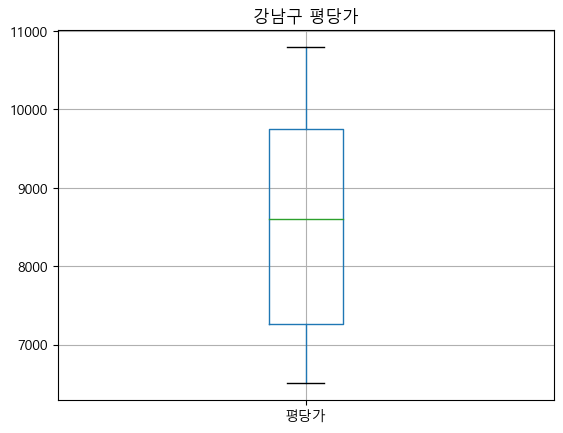

하위 25% :  5441.696113
상위 25% :  6496.4663825
강동구 평균 평당가:  6018.671145381313
강동구 전체 개수 : 396
강동구 필터링 개수 199
이상치 개수(제거) : 197


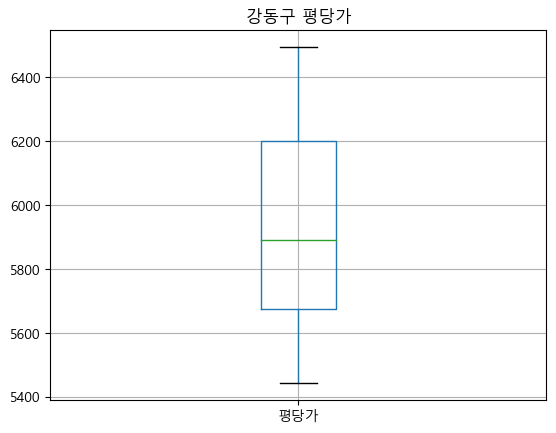

하위 25% :  2932.8105195
상위 25% :  4242.7222255
강북구 평균 평당가:  3721.8485066925878
강북구 전체 개수 : 823
강북구 필터링 개수 411
이상치 개수(제거) : 412


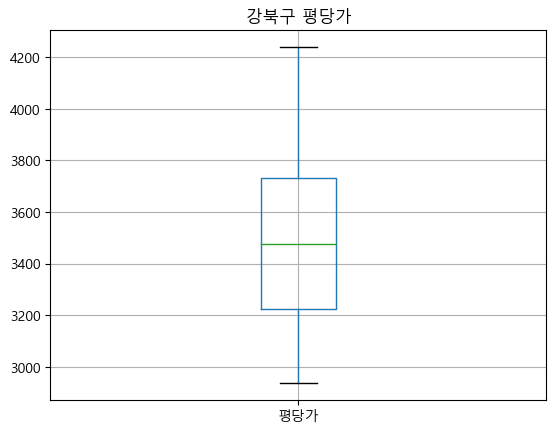

하위 25% :  4645.63025925
상위 25% :  5857.3948224999995
광진구 평균 평당가:  5319.733542807454
광진구 전체 개수 : 322
광진구 필터링 개수 160
이상치 개수(제거) : 162


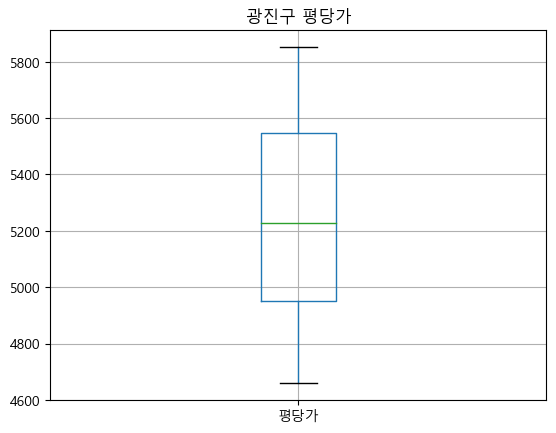

하위 25% :  3448.56917325
상위 25% :  5242.409979
구로구 평균 평당가:  4439.677901950414
구로구 전체 개수 : 242
구로구 필터링 개수 122
이상치 개수(제거) : 120


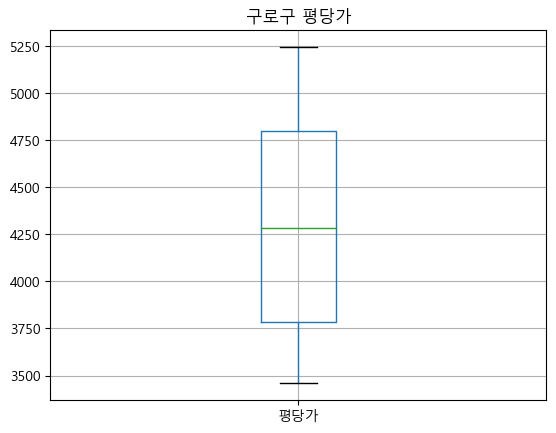

하위 25% :  2355.530026
상위 25% :  3580.681783
노원구 평균 평당가:  3028.1600392222217
노원구 전체 개수 : 135
노원구 필터링 개수 68
이상치 개수(제거) : 67


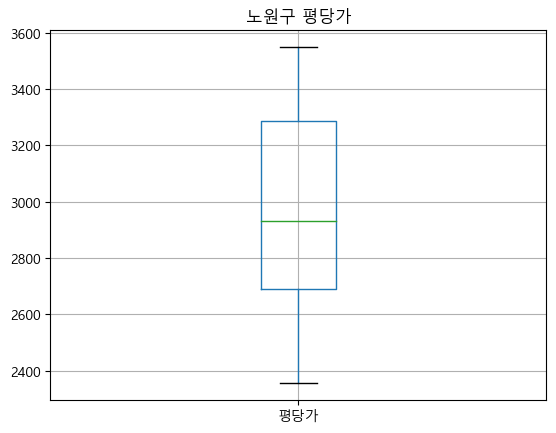

하위 25% :  3527.87913775
상위 25% :  4820.692355499999
동대문구 평균 평당가:  4254.6063409524395
동대문구 전체 개수 : 820
동대문구 필터링 개수 410
이상치 개수(제거) : 410


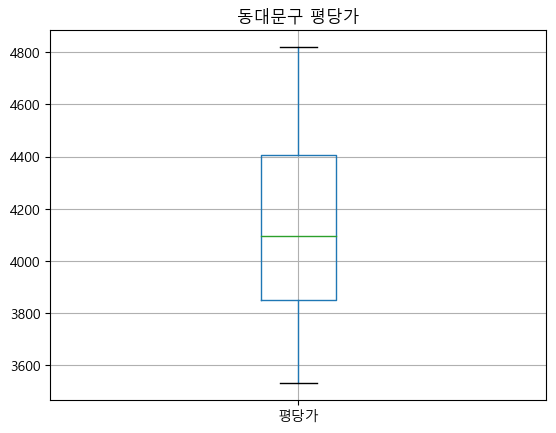

하위 25% :  3975.7832945
상위 25% :  5669.56931
동작구 평균 평당가:  4883.203923665871
동작구 전체 개수 : 419
동작구 필터링 개수 210
이상치 개수(제거) : 209


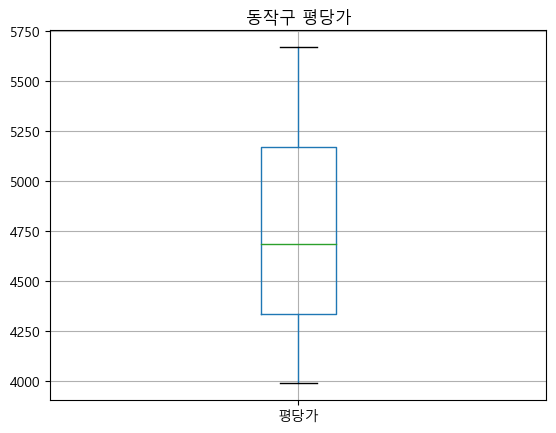

하위 25% :  5146.78688375
상위 25% :  6843.4445157499995
마포구 평균 평당가:  5995.21397973
마포구 전체 개수 : 1100
마포구 필터링 개수 550
이상치 개수(제거) : 550


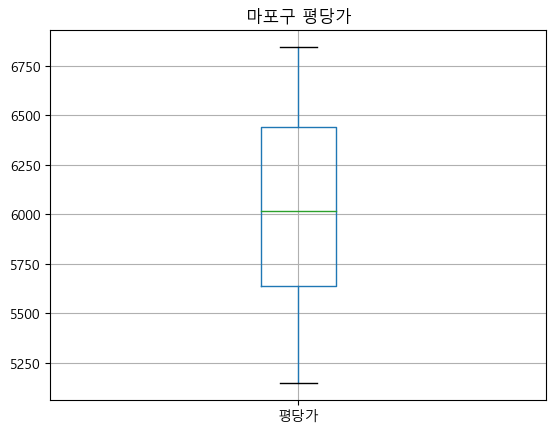

하위 25% :  3716.836309
상위 25% :  4957.9781570000005
서대문구 평균 평당가:  4354.5425593159725
서대문구 전체 개수 : 576
서대문구 필터링 개수 289
이상치 개수(제거) : 287


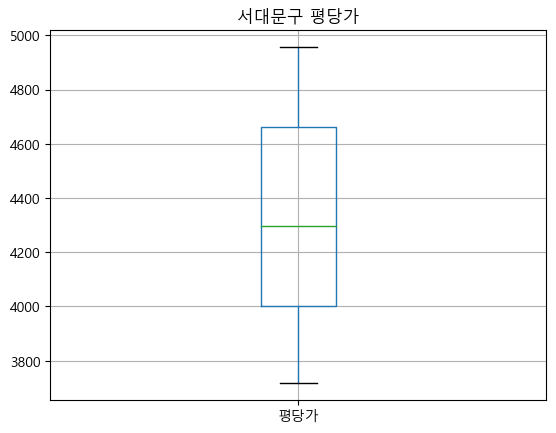

하위 25% :  6751.2007995
상위 25% :  11248.7917325
서초구 평균 평당가:  8802.68245402669
서초구 전체 개수 : 562
서초구 필터링 개수 280
이상치 개수(제거) : 282


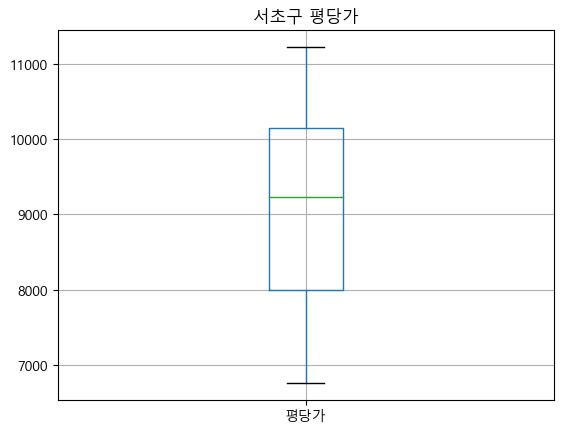

하위 25% :  5314.387211
상위 25% :  7041.173529
성동구 평균 평당가:  6220.226335423582
성동구 전체 개수 : 229
성동구 필터링 개수 115
이상치 개수(제거) : 114


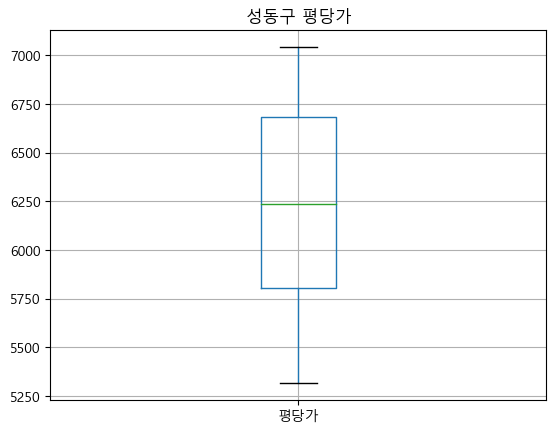

하위 25% :  3871.138882
상위 25% :  4847.270906
성북구 평균 평당가:  4319.467225574203
성북구 전체 개수 : 721
성북구 필터링 개수 361
이상치 개수(제거) : 360


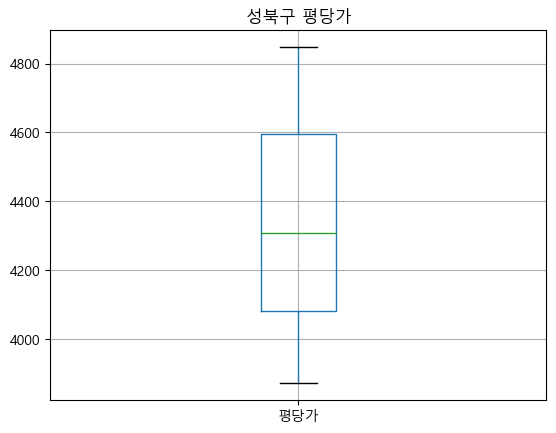

하위 25% :  3562.993454
상위 25% :  6413.957718
송파구 평균 평당가:  5038.167361187739
송파구 전체 개수 : 261
송파구 필터링 개수 131
이상치 개수(제거) : 130


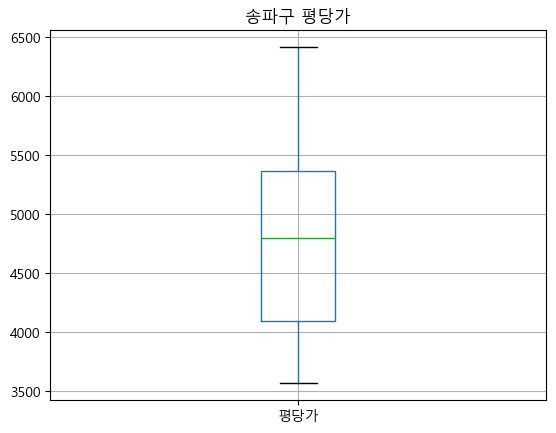

하위 25% :  4029.96349
상위 25% :  5751.12604175
영등포구 평균 평당가:  4958.2659869430045
영등포구 전체 개수 : 386
영등포구 필터링 개수 193
이상치 개수(제거) : 193


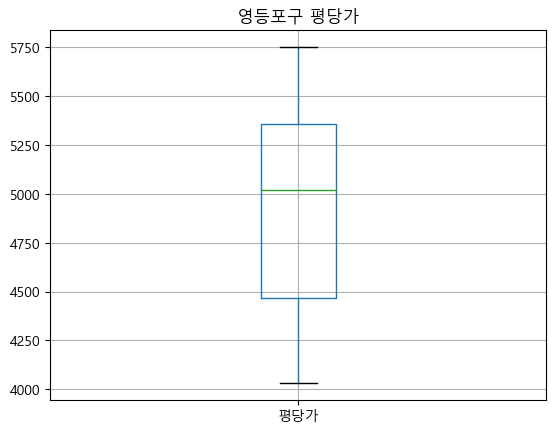

하위 25% :  7959.861993750001
상위 25% :  8837.100121
용산구 평균 평당가:  8595.531619124999
용산구 전체 개수 : 40
용산구 필터링 개수 21
이상치 개수(제거) : 19


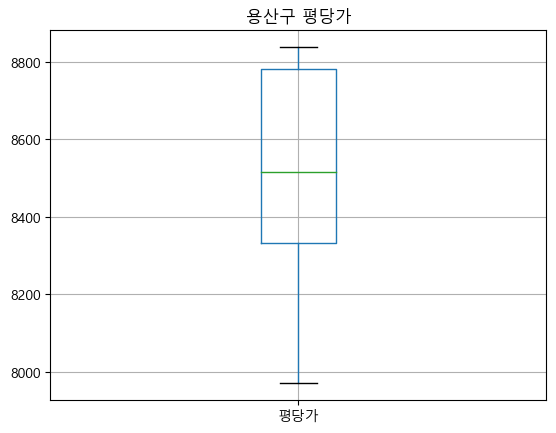

하위 25% :  2560.65895575
상위 25% :  3243.01626575
은평구 평균 평당가:  2914.569621552632
은평구 전체 개수 : 38
은평구 필터링 개수 18
이상치 개수(제거) : 20


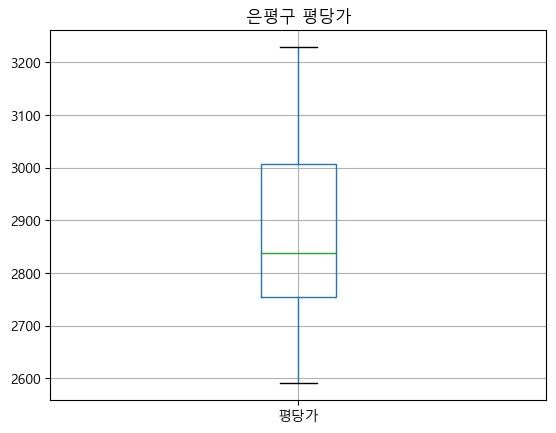

하위 25% :  4229.76964
상위 25% :  4945.747017
양천구 평균 평당가:  4565.591307564103
양천구 전체 개수 : 39
양천구 필터링 개수 19
이상치 개수(제거) : 20


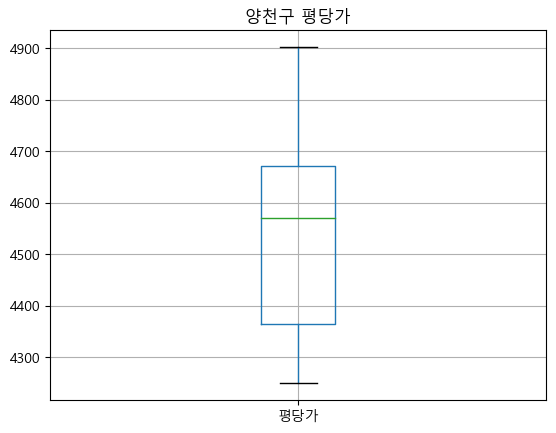

하위 25% :  4132.281982
상위 25% :  5320.075312
중구 평균 평당가:  4775.975228985075
중구 전체 개수 : 67
중구 필터링 개수 34
이상치 개수(제거) : 33


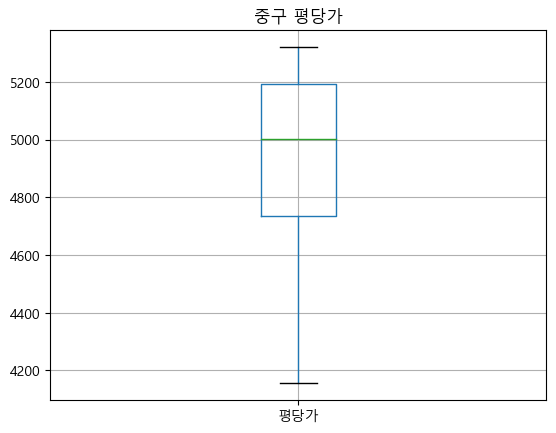

---------------------------------------
전체 시각화


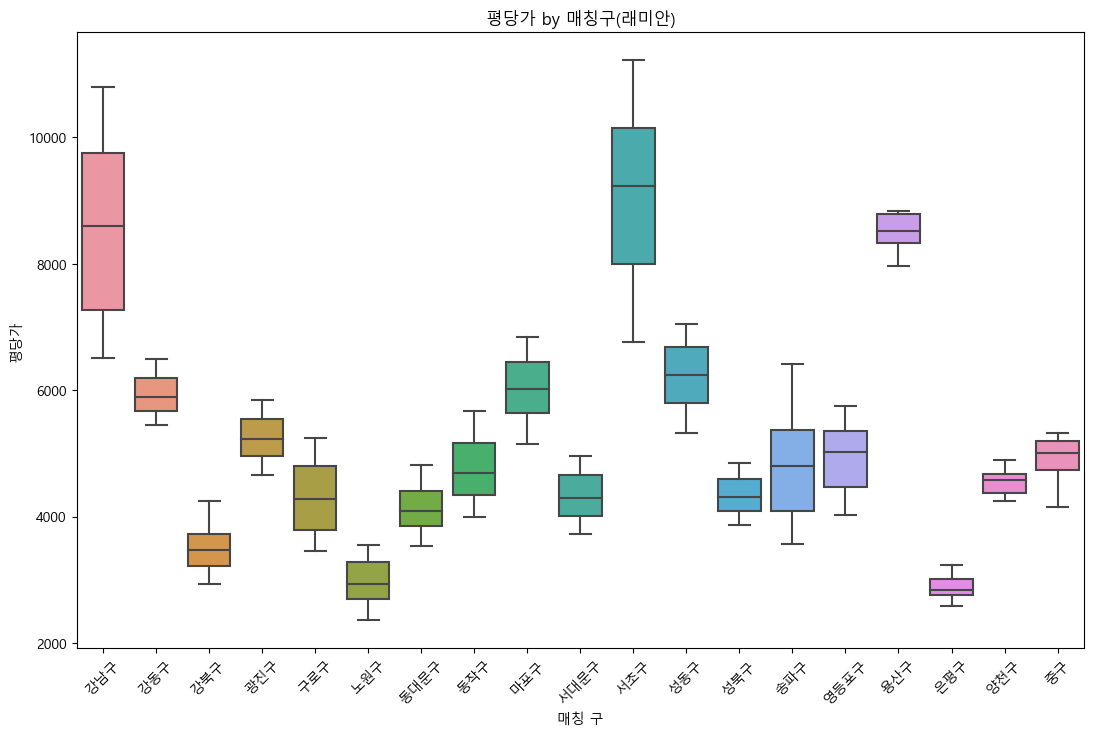

In [6]:
'''
매칭구, 각 구별 총 개수, 각 구별 이상치 개수, 각 구별 시각화, 각 구별 평단가, 전체 시각화
'''
filtered_data_total = pd.DataFrame()
def visualize(data, group):
    data = data[data['매칭 구'] == group]
    low_limit = data["평당가"].quantile(0.25)
    upper_limit = data['평당가'].quantile(0.75)

    filtered_data = data[(data["평당가"] >= low_limit) & (data["평당가"] <= upper_limit)]
    
    global filtered_data_total
    filtered_data_total = pd.concat([filtered_data_total, filtered_data], ignore_index=True)
    
    outliers_count = len(data) - len(filtered_data)

    filtered_data_total.append(data, ignore_index=True)
    
    print("하위 25% : ", low_limit)
    print("상위 25% : ", upper_limit)
    print(f"{group} 평균 평당가: ", data['평당가'].mean())
    print(f"{group} 전체 개수 :", len(data))
    print(f"{group} 필터링 개수", len(filtered_data))
    print("이상치 개수(제거) :", outliers_count) #이미 정수 개수




    #개별 box plot 그리기
    filtered_data.boxplot(column = "평당가")
    plt.title(f"{group} 평당가") #0.25~0.75% 사이 1차 필터링
    plt.show()

group = ['강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '영등포구', '용산구', '은평구', '양천구', '중구']

for i in group:
    visualize(data, i)

print("---------------------------------------")
print("전체 시각화")


plt.figure(figsize=(13,8))
sns.boxplot(x="매칭 구", y="평당가", data=filtered_data_total)
plt.xticks(rotation = 45)
plt.title("평당가 by 매칭구(래미안)")
plt.ylabel("평당가")
plt.xlabel("매칭 구")
plt.show()

